In [10]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

In [2]:
path = r"D:\TRAVAIL\Inge_3\Projet - Prédiction du type d’application Internet dans le contexte de traffic chiffré\network_analysis\data\dataset_clean.csv"

In [3]:
TARGET = 'L7Protocol'

# Import df

In [4]:
df = pd.read_csv(path)

list_protocol = ["AMAZON", "MICROSOFT", "YOUTUBE", "GMAIL", "WINDOWS_UPDATE", "SKYPE", "FACEBOOK", "DROPBOX"]
df = df[df['ProtocolName'].isin(list_protocol)]
df = df.drop(
    [
        "ProtocolName",
        "Month",
        "Day",
        "Protocol",
        "ECE.Flag.Count",
        "RST.Flag.Count",
        "Active.Max",
        "Active.Min",
        "Idle.Mean",
        "Idle.Max",
        "Active.Mean",
        "Idle.Std",
        "Bwd.Packet.Length.Min",
        "FIN.Flag.Count",
        "Min.Packet.Length",
        "Idle.Min",
        "Active.Std",
        "URG.Flag.Count",
        "SYN.Flag.Count",
        "ACK.Flag.Count",
        "Fwd.Packet.Length.Min",
        "Fwd.PSH.Flags",
        "PSH.Flag.Count",
        "Subflow.Fwd.Packets",
        "Total.Fwd.Packets",
        "Subflow.Bwd.Packets",
        "Subflow.Bwd.Bytes",
        "Total.Length.of.Bwd.Packets",
        "Down.Up.Ratio",
        "Bwd.Header.Length",
        "Packet.Length.Variance",
        "Packet.Length.Mean",
        "Subflow.Fwd.Bytes",
        "Max.Packet.Length",
        "Packet.Length.Std",
        "min_seg_size_forward",
        "Fwd.IAT.Max",
        "Average.Packet.Size",
        "Flow.IAT.Mean",
        "Flow.Packets.s",
        "Fwd.Packet.Length.Max",
        "act_data_pkt_fwd",
        "Fwd.Header.Length",
        "Fwd.Header.Length.1",
        "Avg.Bwd.Segment.Size",
        "Bwd.Packet.Length.Min",
        "Total.Backward.Packets",
        "Bwd.Packet.Length.Max",
        "Bwd.Packet.Length.Std",
        "Flow.IAT.Std",
        "Bwd.IAT.Min",
        "Fwd.IAT.Total",
        "Fwd.IAT.Std",
        "Flow.ID",
        "Source.IP",
        "Destination.IP",
        "Bwd.Packet.Length.Mean",
    ],
    axis=1,
)

# X et y

In [5]:
#y = pd.get_dummies(df[TARGET])
y = df[TARGET]
X = df.drop([TARGET],axis=1)

In [6]:
y = y.to_numpy()

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X.shape[1]))

# Modèle

In [41]:
model = Sequential()

model.add(GRU(200, input_shape=(1,20), activation="relu", return_sequences=True))
model.add(GRU(200,activation="relu"))
model.add(Dense(y.shape[1], activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_36 (GRU)                (None, 1, 200)            133200    
                                                                 
 gru_37 (GRU)                (None, 200)               241200    
                                                                 
 dense_10 (Dense)            (None, 213)               42813     
                                                                 
Total params: 417,213
Trainable params: 417,213
Non-trainable params: 0
_________________________________________________________________


In [42]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", 
                                        patience = 3, 
                                        restore_best_weights = True)

In [ ]:
#
history = model.fit(X_train, y_train, 
                    epochs = 25, 
                    validation_data= (X_test, y_test),
                    callbacks =[earlystopping])
history

Epoch 1/25
  841/11797 [=>............................] - ETA: 1:02 - loss: 0.0341 - accuracy: 0.3916

In [22]:
accuracy = model.evaluate(X_test, y_test)
accuracy

2950/2950 [==============================] - 9s 3ms/step - loss: 0.0050 - accuracy: 0.7853


[0.004994470160454512, 0.785294234752655]

In [ ]:
# Note : evolution de l'accuracy
# 0.7215 -> 0.7853

# Graph

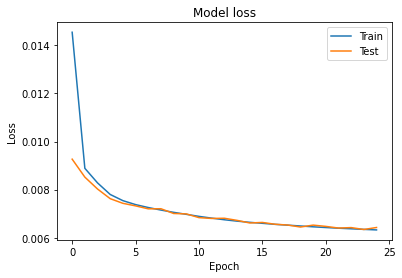

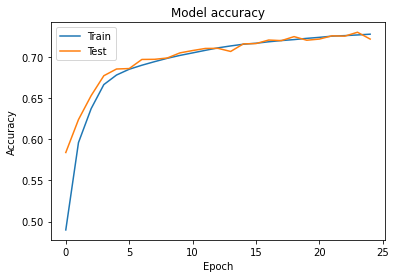

In [18]:
# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])